# 📁 Dataset Dictionary

---

- `Education`: Education level of the employees  
- `JoiningYear`: Year the employee joined the company  
- `City`: City where the employee is located  
- `PaymentTier`: Employee's salary tier in Indian Rupees  
| **Class**      | **Salary Range (₹/month)** | **Notes**      |
|----------------|-----------------------------|----------------|
| **1 - Entry**  | ₹9,000 – ₹15,000             |                |
| **2 - Mid**    | ₹14,001 – ₹30,000            |                |
| **3 - High**   | ₹30,001 and above            |                |
- `Age`: Age of the employee  
- `EverBenched`: Categorical variable indicating whether the employee was ever on the bench (without tasks)  
- `ExperienceInCurrentDomain`: Experience in the current domain (in years)  
- `LeaveOrNot`: Target variable. Indicates whether the employee voluntarily resigned or not
__`Feature Engineering´__
- `YearsAtCompany`: Represents the number of years an employee has been with the company as of 2019. It is calculated by subtracting the employee's joining year (JoiningYear) from the reference year (2018). This feature reflects the employee's tenure and is useful for analyzing experience or length of service within the organization.



    

<div style="background-color:#f2f2f2; padding: 14px; border-radius: 12px; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 18px;">
  <strong>Imported Libraries</strong>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from datetime import datetime


################################################# MODELS ##################################################

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
%reload_ext watermark
%watermark -a "Nuno Leite"

Author: Nuno Leite



In [3]:
df = pd.read_csv(
    r"C:\Users\nuno_\Downloads\Employee.csv"
)

In [4]:
df.head(10).style.set_caption("Employee Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [9]:
df.shape


(4653, 9)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [15]:
for i in df:
    print(i,"-",df[i].nunique())

Education - 3
JoiningYear - 7
City - 3
PaymentTier - 3
Age - 20
Gender - 2
EverBenched - 2
ExperienceInCurrentDomain - 8
LeaveOrNot - 2


## Feature Engineering - replace 'JoiningYear' for 'YearsAtCompany'

In [18]:
df['JoiningYear'] = df['JoiningYear'].astype(int)

actual_year = 2018

df['YearsAtCompany'] = actual_year - df['JoiningYear']

df.drop(['JoiningYear'], axis=1, inplace=True)

In [20]:
df.head(10).style.set_caption("Employee Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsAtCompany
0,Bachelors,Bangalore,3,34,Male,No,0,0,1
1,Bachelors,Pune,1,28,Female,No,3,1,5
2,Bachelors,New Delhi,3,38,Female,No,2,0,4
3,Masters,Bangalore,3,27,Male,No,5,1,2
4,Masters,Pune,3,24,Male,Yes,2,1,1
5,Bachelors,Bangalore,3,22,Male,No,0,0,2
6,Bachelors,New Delhi,3,38,Male,No,0,0,3
7,Bachelors,Bangalore,3,34,Female,No,2,1,2
8,Bachelors,Pune,3,23,Male,No,1,0,2
9,Masters,New Delhi,2,37,Male,No,2,0,1


# Analyzing data with visualizations

         1. Count of employees for Education
         2. Count of employees in every city
         3. Comparing the Payment Tier Distribution of the Company
         4. Female-Male Gender Ratio within the company
         5. Count of employees' years of experience
         6. Age Distribution of employees
         7. Comparison of salaries between men and women
         8. Analyzing the model coefficients
         
        









## 1. Count of employees for Education

In [26]:
df["Education"]

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

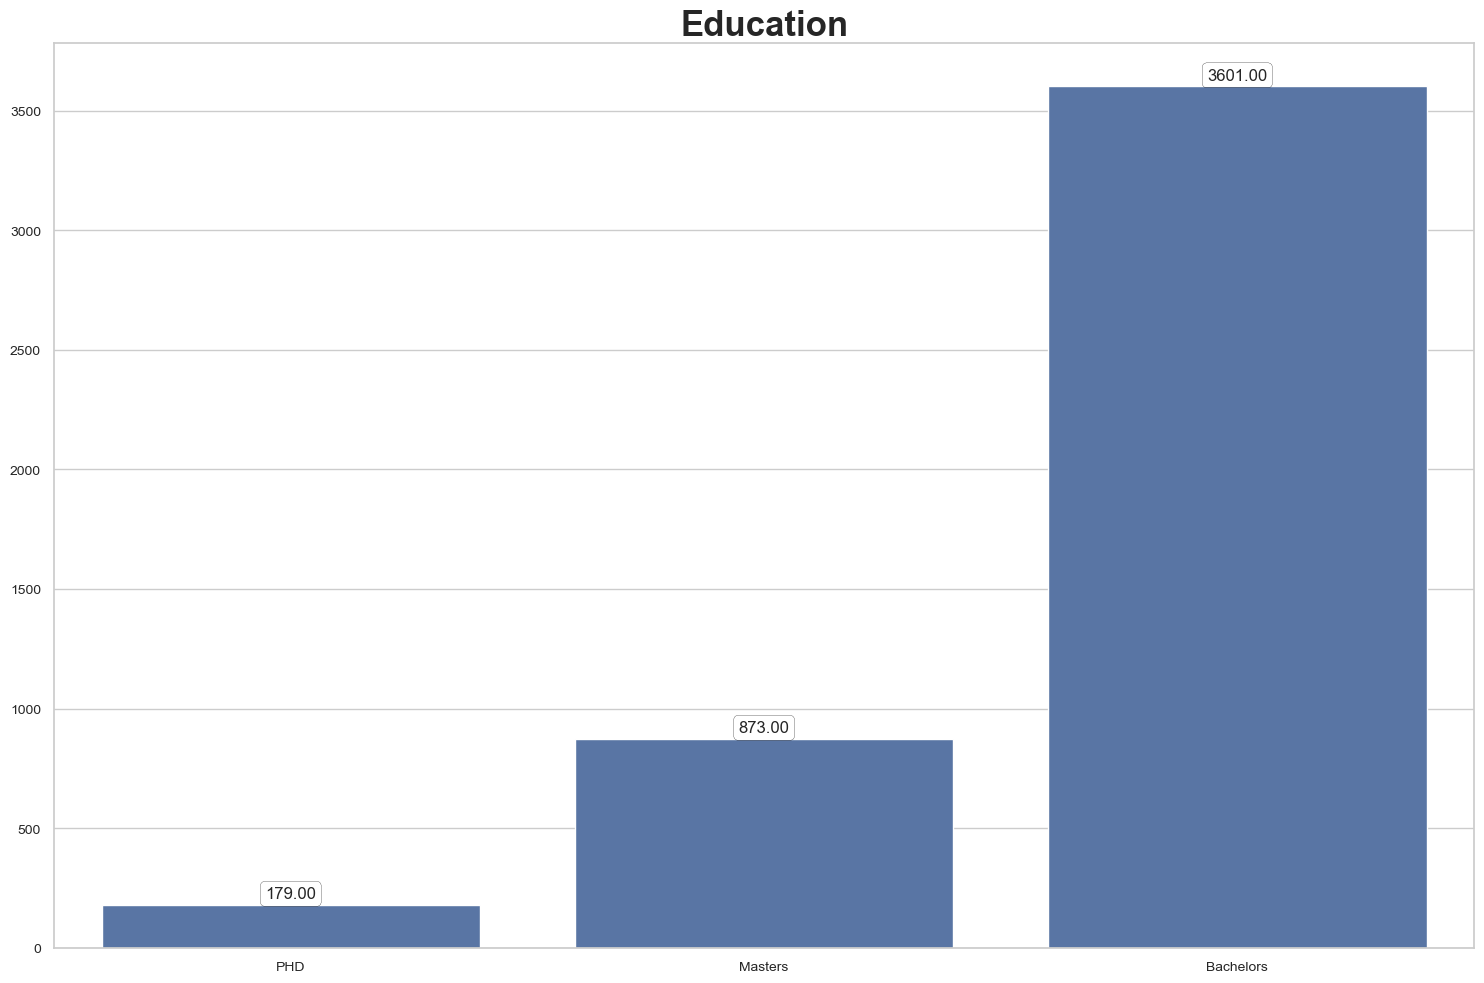

In [28]:
t = df["Education"].value_counts().sort_values(ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t.index,y=t.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
plt.xticks(rotation=0) #Rotating the Label
plt.title("Education",size=25,weight="bold") #Title of the plot
plt.xlabel("",fontsize=20) #Title of x-axis
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

## 2. Count of employees in every city

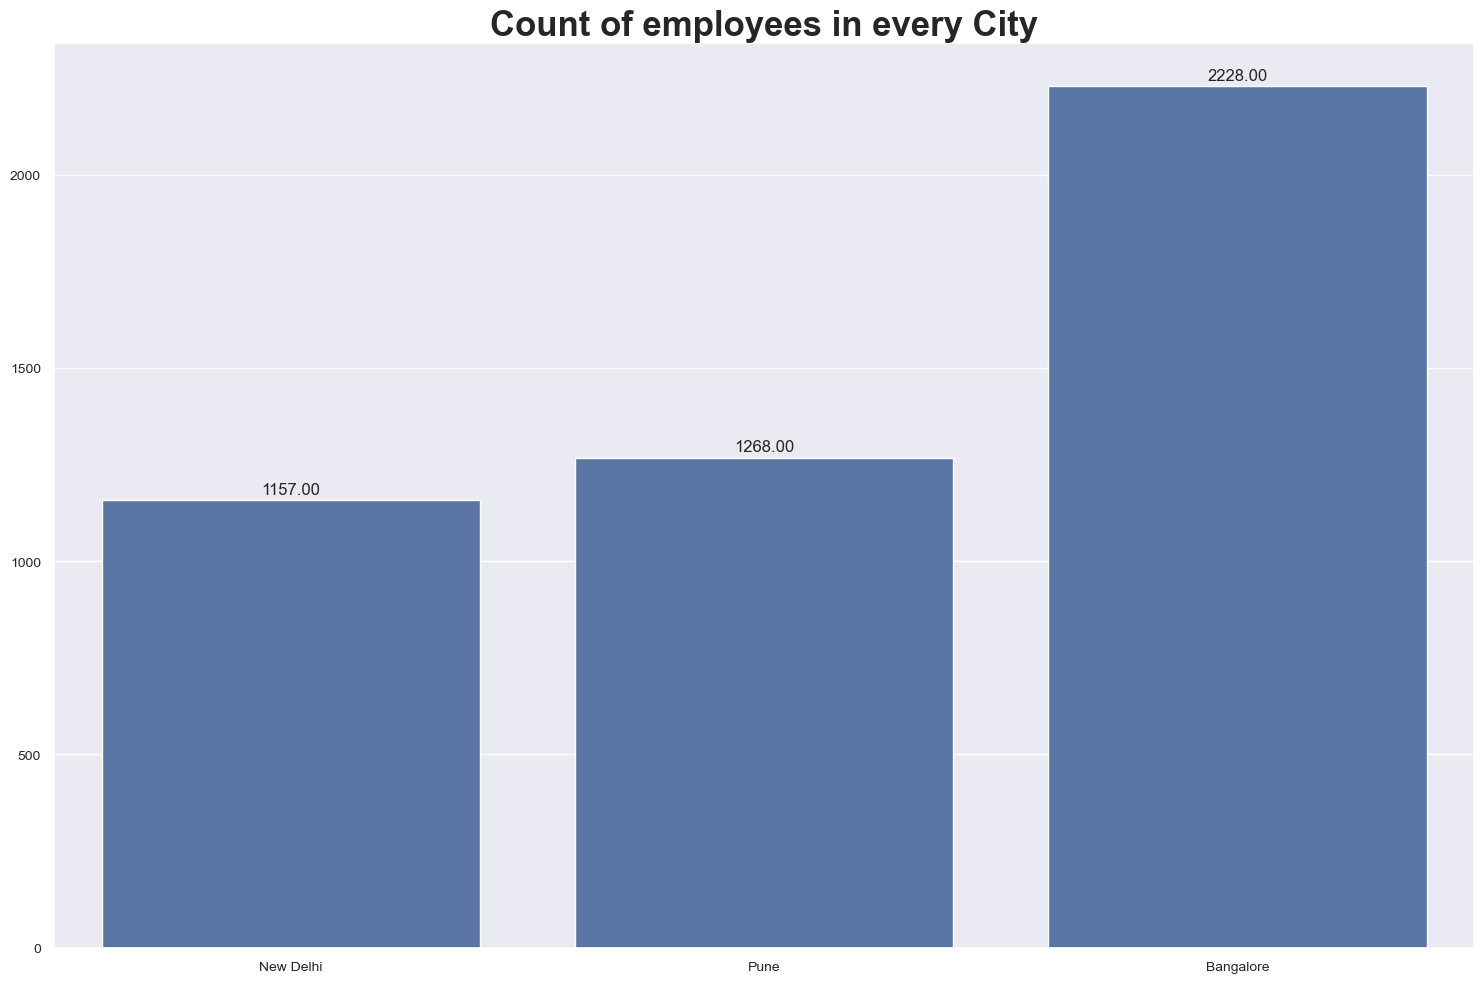

In [31]:
z=df["City"].value_counts().sort_values(ascending=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=z.index,y=z.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0) #Rotating the Label
plt.title("Count of employees in every City",size=25,weight="bold") #Title of the plot
plt.xlabel("") #Title of x-axis
plt.ylabel("")
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

##### Looks like BANGALORE has a higher employee number. Might suggest that the company's based on this city.

In [34]:
y = df.groupby(["City", "Education"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)



In [36]:
y

,City,Education,Count
0,Bangalore,Bachelors,2052
6,Pune,Bachelors,1012
3,New Delhi,Bachelors,537
4,New Delhi,Masters,517
7,Pune,Masters,232
1,Bangalore,Masters,124
5,New Delhi,PHD,103
2,Bangalore,PHD,52
8,Pune,PHD,24


##### 🏙️ City-wise Comparison

- **Bangalore**  
  - Bachelors: 2052  
  - Masters: 124  
  - PHD: 52  
  ➡️ Predominantly Bachelors.

- **Pune**  
  - Bachelors: 1012  
  - Masters: 232  
  - PHD: 24  
  ➡️ Mostly Bachelors, but Masters also notable.

- **New Delhi**  
  - Bachelors: 537  
  - Masters: 517  
  - PHD: 103  
  ➡️ Balanced distribution; Masters and Bachelors are close.

---

##### 🎓 General Insight

PHD is the least common education level across all cities.

## 3. Comparing the Payment Tier Distribution of the Company

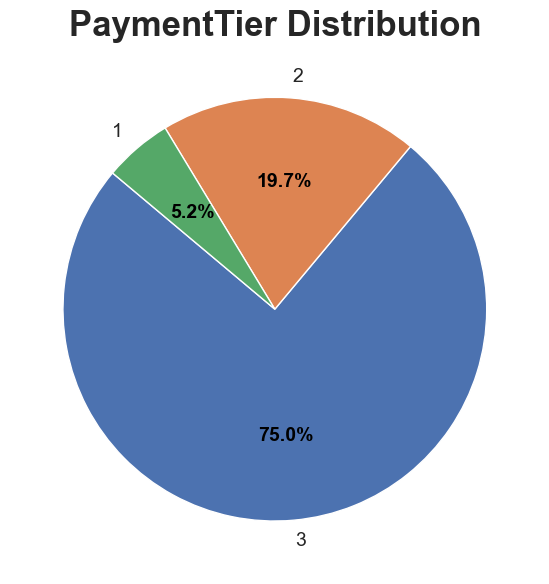

In [40]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,6))

counts = df["PaymentTier"].value_counts()

patches, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                    startangle=140, textprops={'fontsize': 14})
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.title("PaymentTier Distribution", size=25,weight="bold")
plt.tight_layout()
plt.show()

###

The image presents a **Payment Tier Distribution** with the following percentages:  
- **Tier 3**: 75.0% (dominant majority)  
- **Tier 2**: 19.7%  
- **Tier 1**: 5.2%  

This indicates that **Tier 3** is the most common payment tier, while **Tier 1** is the least frequent.  

## 4. Female-Male Gender Ratio within the company


In [44]:
x = df.groupby("Gender").size() / len(df)
x

Gender
Female    0.402966
Male      0.597034
dtype: float64

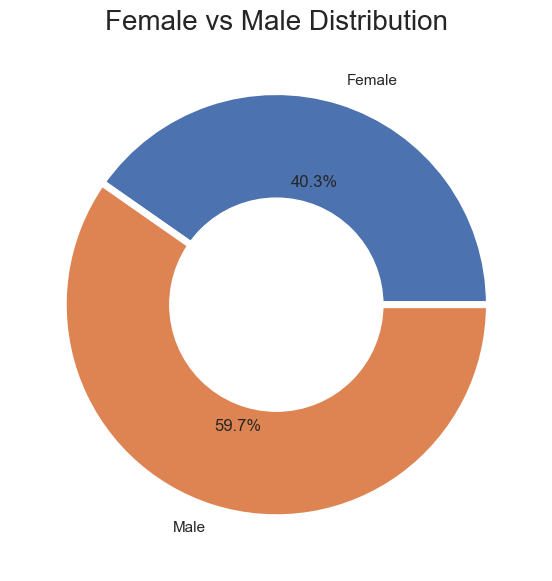

In [46]:
plt.figure(figsize=(6,6))
# Create a Donut Chart
plt.pie(x,labels=x.index,wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },autopct='%2.1f%%')
plt.rc("font",size=13)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Female vs Male Distribution",size=20,loc="center")

plt.tight_layout()

##### There are more Male employees than Females.(59.7% to 40.3%)¶



## 5. Count of employees' years of experience











In [50]:
j = df.groupby("ExperienceInCurrentDomain").size() / len(df)

j

ExperienceInCurrentDomain
0    0.076295
1    0.119923
2    0.233613
3    0.168923
4    0.200086
5    0.197507
6    0.001719
7    0.001934
dtype: float64

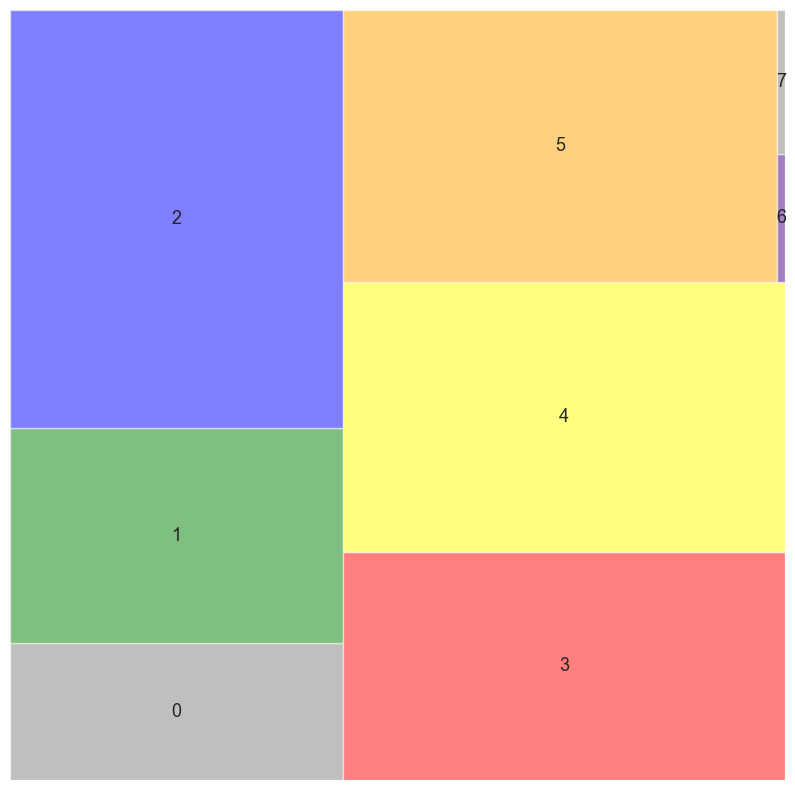

In [52]:
plt.figure(figsize=(10, 10))
squarify.plot(
    sizes=j.values, 
    label=j.index, 
    color=["grey", "green", "blue", "red", "yellow", "orange", "indigo"], 
    alpha=0.5
)
plt.rc('font', size=8)          
plt.axis('off')
plt.show()

Most employees have been with the company for between 2 to 5 years. Very few have been there for 6 or 7 years. This suggests that the company may be relatively new and in a growth phase, or it may have difficulty retaining employees over a long period.

## 6. Age Distribution of employees


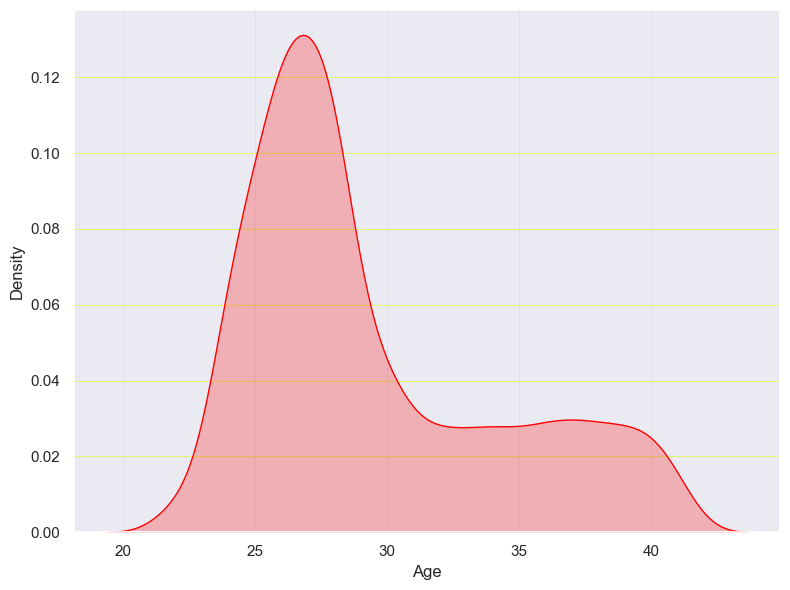

In [56]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.grid(True)
ax=sns.kdeplot(df["Age"],fill=True,color="red")
ax.grid(which='major', axis='x', zorder=0, color='#DFFF00', linewidth=0.4)
ax.grid(which='major', axis='y', zorder=0, color='#DFFF00', linewidth=0.4)
plt.rc('font', size=10,weight="bold")
plt.xticks(rotation=0)
plt.tight_layout()

Most employees are between 25 and 28 years old, and the company has very young staff members working with them.

## 7. Comparison of salaries between men and women











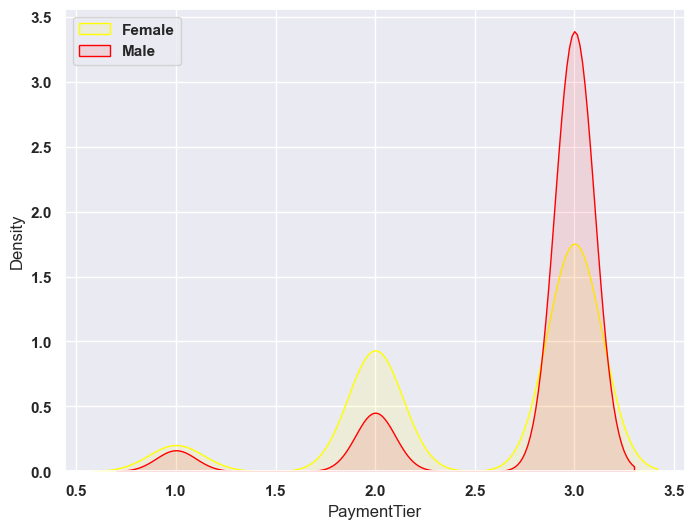

In [60]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.kdeplot(df.loc[(df["Gender"] == "Female"), "PaymentTier"],
            fill=True, color="yellow", label="Female", alpha=0.1)
sns.kdeplot(df.loc[(df["Gender"] == "Male"), "PaymentTier"],
            fill=True, color="red", label="Male", alpha=0.1)
plt.legend()

We can conclude that, in general, women are paid less than men. A large portion of men earn a salary above ₹30,001, while women's salaries are more evenly distributed across the three different classes.

## Realizing why dismissal rates are so high

In [64]:
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [66]:
# Feature separation
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [68]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
# Separation of categorical and numerical variables
cat_features = X.select_dtypes(include = ['object']).columns.tolist()
num_features = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()

#### Data processing Pipeline

In [73]:
# Pipeline numeric variables
numeric_transformer = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=6)), 
    ('scaler', StandardScaler())
])

In [75]:
# Pipeline categorical variables
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [77]:
# Preprocessor
preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, num_features),
            ('cat', cat_transformer, cat_features)])

In [79]:
# Pipeline modeling
model_df = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [81]:
# Training the model
model_df.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=6)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PaymentTier', 'Age',
                                                   'ExperienceInCurrentDomain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education', 'City',
                                                   'Gender',
                                                   'EverBenched'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [83]:
# test data predictions
y_pred = model_df.predict(X_test)

In [85]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7443609022556391

## Analyzing the model coefficients

In [88]:
coefficients = model_df.named_steps['classifier'].coef_[0]

In [90]:
# Attribute names
feature_names = num_features + list(model_df.named_steps['preprocessor'] \
                                    .transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))

feature_names

['PaymentTier',
 'Age',
 'ExperienceInCurrentDomain',
 'Education_Bachelors',
 'Education_Masters',
 'Education_PHD',
 'City_Bangalore',
 'City_New Delhi',
 'City_Pune',
 'Gender_Female',
 'Gender_Male',
 'EverBenched_No',
 'EverBenched_Yes']

In [94]:
# Dataframe
coeff_df = pd.DataFrame({'Attribute': feature_names, 'Coefficient': coefficients}).sort_values(by = 'Coefficient', ascending = False)
# Display
coeff_df.head(10)

,Attribute,Coefficient
8,City_Pune,0.592030
4,Education_Masters,0.533552
9,Gender_Female,0.387371
12,EverBenched_Yes,0.256822
2,ExperienceInCurrentDomain,-0.081826
1,Age,-0.085286
6,City_Bangalore,-0.126285
0,PaymentTier,-0.202916
5,Education_PHD,-0.296749
3,Education_Bachelors,-0.325654


## 8. Analyzing the model coefficients

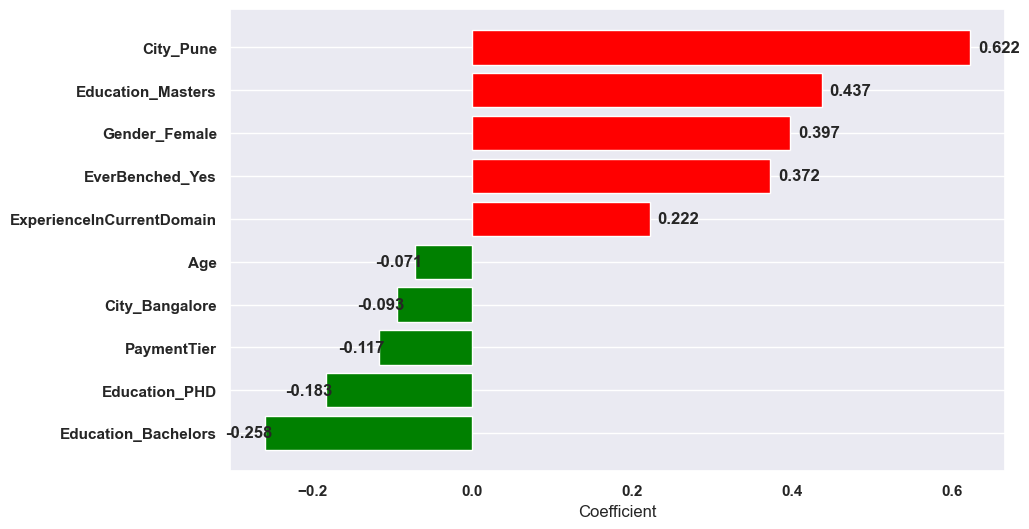

In [96]:
attributes = [
    "City_Pune", "Education_Masters", "Gender_Female", 
    "EverBenched_Yes", "ExperienceInCurrentDomain", "Age",
    "City_Bangalore", "PaymentTier", "Education_PHD", "Education_Bachelors"
]
coefficients = [
    0.621877, 0.436678, 0.396845, 0.371811, 0.221640,
    -0.071376, -0.093341, -0.116943, -0.183141, -0.258226
]

attributes = attributes[::-1]
coefficients = coefficients[::-1]

plt.figure(figsize=(10, 6))
bars = plt.barh(attributes, coefficients, color=['red' if x > 0 else 'green' for x in coefficients])
plt.xlabel('Coefficient')
plt.title('')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01 if width > 0 else width - 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center')

plt.grid(axis='x')
plt.show()

# Analysis of The Results

| Attribute               | Coefficient | Interpretation                                                                                           |
|------------------------|-------------|--------------------------------------------------------------------------------------------------------|
| City_Pune (0.62)       | +0.62       | People living in Pune are more likely to voluntarily resign.                                           |
| Education_Masters (0.44) | +0.44       | People with a master's degree also tend to leave the company.                                         |
| Gender_Female (0.40)   | +0.40       | Being female is also associated with this phenomenon. We previously observed that females are the most disadvantaged in terms of salary. |
| EverBenched_Yes (0.22) | +0.37       | Having been "benched" (without a task) is positively associated, though with a smaller impact.         |
| ExperienceInCurrentDomain +0.22  | The greater the employee's experience in the domain, the higher the probability of resignation.       |
| Age (-0.09)            | -0.07       | Age has a negative effect. The older the employee, the lower the probability of resignation.           |
| City_Bangalore (-0.12) | -0.09       | People from Bangalore tend to negatively impact the outcome.                                           |
| PaymentTier (-0.18)    | -0.12       | A higher payment tier also contributes to greater employee retention.                                 |
| Education_PHD (-0.26)  | -0.18       | Employees with a PhD (a smaller class) do not tend to resign.                                          |


In [100]:
%watermark -a "Nuno Leite" -d -t -v -p numpy,pandas,matplotlib,seaborn,scikit-learn

Author: Nuno Leite

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

numpy       : 1.26.4
pandas      : 2.2.3
matplotlib  : 3.9.2
seaborn     : 0.13.2
scikit-learn: 1.6.1

